## Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import KFold

## CIFAR100

In [2]:
# Load the data from the CIFAR100 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data()

In [3]:
print("train_images.shape is ", train_images.shape)
print("train_labels.shape is ", train_labels.shape)
print("test_images.shape is ", test_images.shape)
print("test_labels.shape is ", test_labels.shape)

train_images.shape is  (50000, 32, 32, 3)
train_labels.shape is  (50000, 1)
test_images.shape is  (10000, 32, 32, 3)
test_labels.shape is  (10000, 1)


## Visualizing all 100 classes

c:\Users\mosta\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


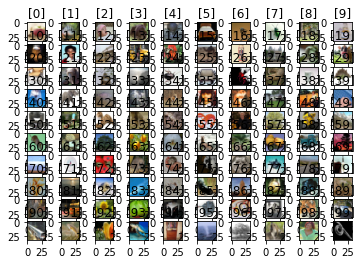

In [4]:
for i in range(100):
    for j in range(len(train_labels)):
        if train_labels[j] == i:
            plt.subplot(10,10,i+1)
            plt.imshow(train_images[j])
            plt.title(train_labels[j])
            break
plt.show()

## Visualizing before normalization

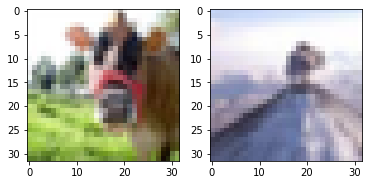

In [5]:
plt.subplot(1,2,1)
plt.imshow(train_images[0])
plt.subplot(1,2,2)
plt.imshow(test_images[0])
plt.show()

## Normalization

In [6]:
#normalize the data by subtarcting the mean and dividing by the standard deviation
training_images_norm = (train_images - np.mean(train_images)) / np.std(train_images)
testing_images_norm = (test_images - np.mean(test_images)) / np.std(test_images)

## Visualizing after normalization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


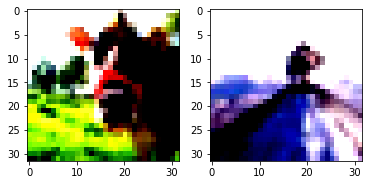

In [7]:
plt.subplot(1,2,1)
plt.imshow(training_images_norm [0])
plt.subplot(1,2,2)
plt.imshow(testing_images_norm[0])
plt.show()

## Dividing data into training(40,000), validation(10,000) and there are 10,000 testing picture

In [8]:
#divide the data into training and validation sets
training_images, validation_images = training_images_norm[:40000], training_images_norm[40000:]
training_labels, validation_labels = train_labels[:40000], train_labels[40000:]

## CNN model

In [9]:
#build the model with CNN layers
model_CNN = tf.keras.models.Sequential()
model_CNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_CNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN.add(tf.keras.layers.Flatten())
model_CNN.add(tf.keras.layers.Dense(64, activation='relu'))
model_CNN.add(tf.keras.layers.Dense(100, activation='softmax'))
model_CNN.summary()
#compile the model
model_CNN.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

## CNN training

In [ ]:
#train the CNN model
history_CNN = model_CNN.fit(training_images,training_labels, epochs=10, validation_data=(validation_images, validation_labels))

## Evaluating CNN model

In [ ]:
#evaluate the CNN model
test_loss_CNN, test_acc_CNN = model_CNN.evaluate(testing_images_norm,  test_labels, verbose=2)
print('Test accuracy:', test_acc_CNN)

## Predicting testing data using CNN model

In [ ]:
#predict the labels for the test images(CNN)
predictions_CNN = model_CNN.predict(testing_images_norm)

## Plotting accuracy of training and testing data using CNN model 

In [ ]:
#plot the accuracy and loss for the CNN model
plt.plot(history_CNN.history['accuracy'], label='accuracy')
plt.plot(history_CNN.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## Plotting loss of training and testing data using CNN model 

In [ ]:
#plot the loss for the CNN model
plt.plot(history_CNN.history['loss'], label='loss')
plt.plot(history_CNN.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()